## Learning objectives

Today we will learn about the plug in principle, which will (using our assumptions) allow us to finally talk about the population! We learn when to use it, what the tradeoffs are and go through some examples using it.

## Back to the assumptions

So we are finally at the point where we are able to fully understand the assumption that I made a long time ago, and for those that forgot it, let's throw it back up:

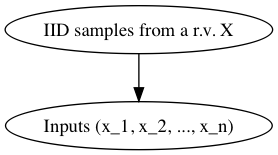

In [9]:
import networkx as nx
from nxpd import draw
from nxpd import nxpdParams
nxpdParams['show'] = 'ipynb'

G = nx.DiGraph()
G.add_node('IID samples from a r.v. X')
G.add_node('Inputs (x_1, x_2, ..., x_n)')
G.add_edge('IID samples from a r.v. X', 'Inputs (x_1, x_2, ..., x_n)')
draw(G)

So I have two assumptions, first is that I can generate IID samples from a r.v. X, and the second is that I have those samples as my input. And it turns out that we can work with these for a while before we need more! But let's recap.

The first assumption says that there is some r.v. (a single one/identically distributed!) that we are sampling from. This means we have isolated where we get the data from, and we are very truthful about it.

In the Truman election they wanted to sample the single variable: americans, so that they could estimate who would win the election (because you see americans vote in the american election).

So they picked up their phone and called everyone that they could and they asked them who they were voting for. Do you see the problem? 

They weren't sampling americans, they were sampling americans with a phone! They were sampling the wrong population.

The first assumption also says that those samples should be independent. Meaning that their outcomes don't depend on each other. Thus if you gather the data in such a way, you will hit the first assumption.

The second assumption is easy: you have the data.

And with only this much we can get cracking. 

## Plug in Principle

Okay let's start off with the basics, what we are most interested in is the population distribution. For example: what is the height of all people in the world (imagine how much money it would take to collect all that data)! 

If we had that then we could answer nearly any question you could imagine about people's heights. But this is as I said above, often too hard or impossible to get. So the next best thing we can do is get summary statistics of the population (or at least our best guesses as to where they should be). 

One way to get this is with the Plug in Principle!

So let's get started



### Population and Sample

So lets say that we are trying to figure out how many trees are in each person's back yard. I don't have this data but I am going to make it up. I'll call this data the population distribution and you can see it below:

In [12]:
import numpy as np

population_dist = np.random.poisson(lam=.5, size=1000)

population_dist[:10]

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0])

Normally you would not have access to this informaiton. But for learning's sake let's say we do. Normally we would only have access to a sample of the population. Below I will take some IID samples from the population:

In [13]:
sample = np.random.choice(population_dist, 10, False)

sample

array([1, 1, 1, 0, 0, 0, 0, 0, 1, 0])

Now time for the question. Let's say we were interested in the median number of trees in somebody's back yard, and we only have the sample data. What could we do to estimate this function of the population? 

Well it turns out this is where the plug in principle comes in handy. Let me explain it in _ parts



#### The Question 

I want to remind ourselves the question that we are looking to answer. In broad terms we are looking to find a function of our population, eg. the median number of trees in backyards. Almost any real world question about a population can be phrased as a function. 

#### The Assumptions

The assumptions that we have to answer this question are twofold:

1. We have samples from the populaiton
2. The samples are IID

#### The Answer

It turns out that applying the function to the sample is our best guess as to what the function would be on the population. And that is the plug in princple, and something that you will have to take on faith.

The proofy statement normally goes:

<blockquote>
    In a nonparametric framework, the empirical distribution (the sample) is a minimal sufficent statistic for the true distribution (the population). In this case, the plug-in principle provides nonparametric maximum likelihood estimates.
</blockquote>

#### The tradeoff

There is one tradeoff here, and that is the larger the sample the better the plug in principle will work. I think the best way to see this is if you were interested in what the average height of people was in the US and you sampled everybody in the US, well then you would just need to average your sample and you'd have the right answer. 

The smaller your sample, the faster it is to get, but the worse the plug in prinicple will work. 

#### The Catch

Here is the catch. Just because the plug in principle is our best guess, does not make it a good guess. It could be a terrible one! But we will leave this problem till next time!

So let's try the plug in principle out below:

In [14]:
print np.median(population_dist)
print np.median(sample)

0.0
0.0


Well that's not so bad right? But let's make this more fun. Let's make a really complex function. Let's say we were interested in the chance that any 10 randomly choosen yards would have no trees in them. Pretty complex. 

How would you find the answer to this if you had the full population data? Perhaps you would randomly pick sets of 10 trees from the population data and see if they all had no trees. See below:

In [15]:
def ten_yards_no_trees():
    random_set = np.random.choice(population_dist, 10, False)
    if random_set.sum() == 0:
        return 1
    else:
        return 0

What have we made? We have in fact made a random variable!!! We are in fact quite interested in the mean of this random variable, because it turns out to be the chance that any 10 randomly choosen yards would have no trees! Well how do we find the mean of random variable? 

That is right, we take samples from it! Hopefully a lot of them:

In [16]:
np.mean([ten_yards_no_trees() for _ in range(9999)])

0.0087008700870087

Okay, we have a function of our population. In real life we would not be able to use the population data, so what would we do? Well by the plug in principle we would apply this function to the sample!

Do you see any problems?

Well there is a small problem. What would happen if we randomly pick sets of 10 trees from our sample of size 10... Well it would always be the same sample. So what do we do? 

Well there is a little trick that we can use. It turns out there is something called picking with replacement. It has a lot of the same properties, the only difference between just picking randomly and picking randomly with replacement is that instead of only being able to pick each number once, we can pick it many times. 

If you can imagine pulling balls from a bag, you take one out, record its number, put it back in again, shuffle the bag around and repeat.

So let's do sampling with replacement and see what we get:

In [17]:
def ten_yards_no_trees():
    # notice the replace
    random_set = np.random.choice(sample, 10, replace=True)
    if random_set.sum() == 0:
        return 1
    else:
        return 0
    
    
np.mean([ten_yards_no_trees() for _ in range(9999)])

0.0058005800580058003

Not too bad right? 

## Why is this important

Well I have finally told you the trick to allow you to talk about data that you have not seen, and that trick is the plug in principle.

Next time we will deal with the catch in the plug in principle: it might be the best guess, but is it any good at all?

## Learning objectives

Today we will learn about the plug in principle, which will (using our assumptions) allow us to finally talk about the population! We learn when to use it, what the tradeoffs are and go through some examples using it.

## Comprehension Questions

1.	What are problems with our current assumptions? Do we deal with black swans?
2.	Is there a way that you could see the Truman election sampling as violating independence?
3.	What is a good way to verify the plug in principle works?
4.	Define population and sample from a data science perspective.
5.	How big of a sample is big enough for the plug in principle to work? 
6.	What if we were interested in the percent of times that the plug in principle is off by more than 1 when estimating the sample median for the population in this lecture? Could you code it up?
7.	Why doesn’t the plug in principle work if we don’t have our assumptions?
